# **LEAD SCORING CASE STUDY**

## **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## **Objective**
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## **Steps**
1. Reading and Understanding the Dataset
2. Data Preprocessing
3. Exploratory Data Analysis
4. Data Preparation
5. Model Building

# **1. Reading and Understanding the Dataset** 

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

%matplotlib inline

pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [3]:
# Reading leads.csv dataset
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df_dict = pd.read_excel('Leads Data Dictionary.xlsx',header=2)
df_dict.drop('Unnamed: 0',axis=1,inplace = True)
df_dict.head()

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.shape

(9240, 37)

# **2. Data Preprocessing**

## **a) Dropping sales team generated columns**

In [8]:
sales_gen = ['Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score',  
             'Tags','Last Notable Activity','Lead Quality','Lead Profile','Last Activity']
df.drop(sales_gen, axis=1, inplace=True)

In [9]:
# dropping 'Prospect ID' & 'Lead Number' as they won't be of much use during analysis and model building
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

## **b) Treating system generated categories**

In [10]:
# Replacing "Select" i.e. a system generated categories  with Null values
cols = ['City','How did you hear about X Education','Specialization']
for col in cols:
  df[col].replace({'Select':np.nan}, inplace=True)

## **c) Checking percentage of missing values**

In [11]:
# Percentage of missing values
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## **d) Dropping columns which have more 35% missing values**

In [12]:
# Dropping columns having more than 35% missing values
cols = df.isnull().sum()[round(df.isnull().sum()/df.shape[0]*100,2)>35].index.tolist()
df.drop(cols, axis=1, inplace=True)

In [13]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

## **e) Dropping skewed categorical columns**

In [14]:
# Checking for skewness in 'Search' column
round(df['Search'].value_counts(normalize=True)*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [15]:
# Checking for skewness in 'What matters most to you in choosing a course' column
round(df['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

In [16]:
# Checking for skewness in 'Do Not Call' column
round(df['Do Not Call'].value_counts(normalize=True)*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

Similarly after measuring skewness in all other categorical columns, below is the list for columns where skewness was observed.

In [17]:
# List of columns which are skewed
cols = ['Search','What matters most to you in choosing a course','Do Not Call','Country','Newspaper Article','X Education Forums',  
        'Newspaper','Digital Advertisement','Through Recommendations','Update me on Supply Chain Content','Get updates on DM Content', 
        'Receive More Updates About Our Courses','Magazine','I agree to pay the amount through cheque']

# Dropping columns which have skewness
df.drop(cols,axis=1,inplace=True)

In [18]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No


## **f) Combining categories with few samples**

Grouping categories in 'Lead Origin' column

In [19]:
# Checking sample distribution in each category
round(df['Lead Origin'].value_counts(normalize=True)*100,2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

In [20]:
# Merging 'Quick Add Form' and 'Lead Import' with 'Lead Add Form'
df['Lead Origin'].replace({"Quick Add Form":"Lead Add Form"},inplace=True)
df['Lead Origin'].replace({"Lead Import":"Lead Add Form"},inplace=True)
round(df['Lead Origin'].value_counts(normalize=True)*100,2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               8.38
Name: Lead Origin, dtype: float64

Grouping categories in 'Lead Source' column

In [21]:
# Checking sample distribution in each category
round(df['Lead Source'].value_counts(normalize=True)*100,2)

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Social Media          0.02
Press_Release         0.02
Live Chat             0.02
welearnblog_Home      0.01
WeLearn               0.01
Pay per Click Ads     0.01
testone               0.01
youtubechannel        0.01
NC_EDM                0.01
blog                  0.01
Name: Lead Source, dtype: float64

In [22]:
# Merging categoried having very few samples
df['Lead Source'].replace({"google":"Google"},inplace=True)
categories = ["Welingak Website","Referral Sites","Facebook","bing","Click2call","Social Media","Press_Release","Live Chat","testone","NC_EDM","WeLearn","blog","Pay per Click Ads","youtubechannel","welearnblog_Home"]
for cat in categories:
  df['Lead Source'].replace({cat:"Other sources"},inplace=True)
round(df['Lead Source'].value_counts(normalize=True)*100,2)

Google            31.21
Direct Traffic    27.63
Olark Chat        19.07
Organic Search    12.54
Reference          5.80
Other sources      3.75
Name: Lead Source, dtype: float64

Grouping categories in 'What is you current occupation' column

In [23]:
# Renaming 'What is your current occupation' to 'Occupation'
df.rename({'What is your current occupation':'Occupation'},inplace=True,axis=1)
round(df['Occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: Occupation, dtype: float64

In [24]:
# Merging "Housewife" and "Student" with "Unemployed"
df['Occupation'].replace({"Housewife":"Unemployed"},inplace=True)
df['Occupation'].replace({"Student":"Unemployed"},inplace=True)
# Merging "Businessman" with "Working Professional"
df['Occupation'].replace({"Businessman":"Working Professional"},inplace=True)
# Since very few samples fall under "Other" category, it can be merged with "Unemployed"
df['Occupation'].replace({"Other":"Unemployed"},inplace=True)
round(df['Occupation'].value_counts(normalize=True)*100,2)

Unemployed              89.1
Working Professional    10.9
Name: Occupation, dtype: float64

## **g) Dropping rows having high missing values**

In [25]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Occupation                                29.11
A free copy of Mastering The Interview     0.00
dtype: float64

In [26]:
# dropping rows where "Occupation" is null, as impution is not possible due to high missing percentage
df = df[~(df['Occupation'].isnull())]

In [27]:
df.shape

(6550, 9)

## **h) Imputing missing values**

In [28]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                               0.00
Lead Source                               0.55
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.98
Total Time Spent on Website               0.00
Page Views Per Visit                      1.98
Occupation                                0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6550 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6550 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6550 non-null   object 
 3   Converted                               6550 non-null   int64  
 4   TotalVisits                             6420 non-null   float64
 5   Total Time Spent on Website             6550 non-null   int64  
 6   Page Views Per Visit                    6420 non-null   float64
 7   Occupation                              6550 non-null   object 
 8   A free copy of Mastering The Interview  6550 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 511.7+ KB


In [30]:
# Filling missing values in 'Lead Source' with its mode i.e. 'Google'
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

In [31]:
# Filling missing values in 'TotalVisits' and 'Page Views Per Visit' with median
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [32]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Occupation                                0
A free copy of Mastering The Interview    0
dtype: int64

## **i) Outliers Treatment**

In [33]:
num_cols = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

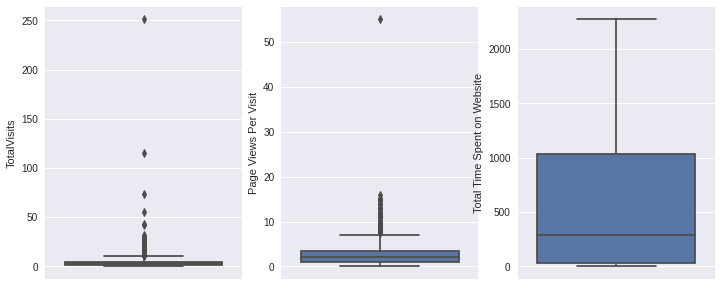

In [34]:
# Plotting boxplots of numerical columns
fig,ax = plt.subplots(1,3,figsize=(12,5))
for i,col in enumerate(num_cols):
  sns.boxplot(data=df,y=col,ax=ax[i])

In [35]:
df['TotalVisits'].quantile([1,0.99])

1.00    251.0
0.99     17.0
Name: TotalVisits, dtype: float64

In [36]:
df['Page Views Per Visit'].quantile([1,0.99])

1.00    55.0
0.99     9.0
Name: Page Views Per Visit, dtype: float64

In [37]:
# Capping 'Page Views Per Visit' at 99 percentile
cap = df['Page Views Per Visit'].quantile(0.99)
df['Page Views Per Visit'][df['Page Views Per Visit'] > cap] = cap

In [38]:
# Capping 'TotalVisits' at 99 percentile
cap = df['TotalVisits'].quantile(0.99)
df['TotalVisits'][df['TotalVisits'] > cap] = cap

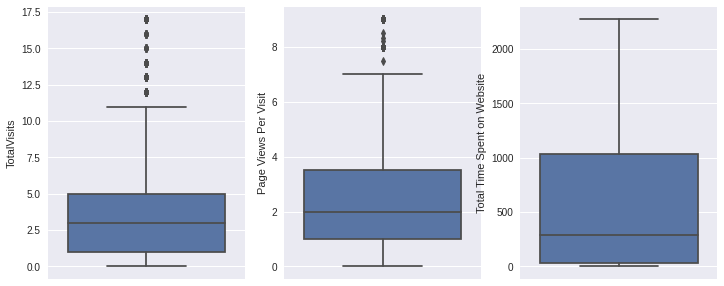

In [39]:
# Plotting boxplots after outlier treatment
fig,ax = plt.subplots(1,3,figsize=(12,5))
for i,col in enumerate(num_cols):
  sns.boxplot(data=df,y=col,ax=ax[i])

## **j) Percentage of rows left after data cleaning process**

In [40]:
rows_init = 9240 # Initial length of the dataset

print(f'Pecentage of rows left after pre-processing is {round(len(df)/rows_init*100,2)}')

Pecentage of rows left after pre-processing is 70.89


# **3. Exploratory Data Analysis**

## **a) Univariate Analysis**

### **i) Categorical**

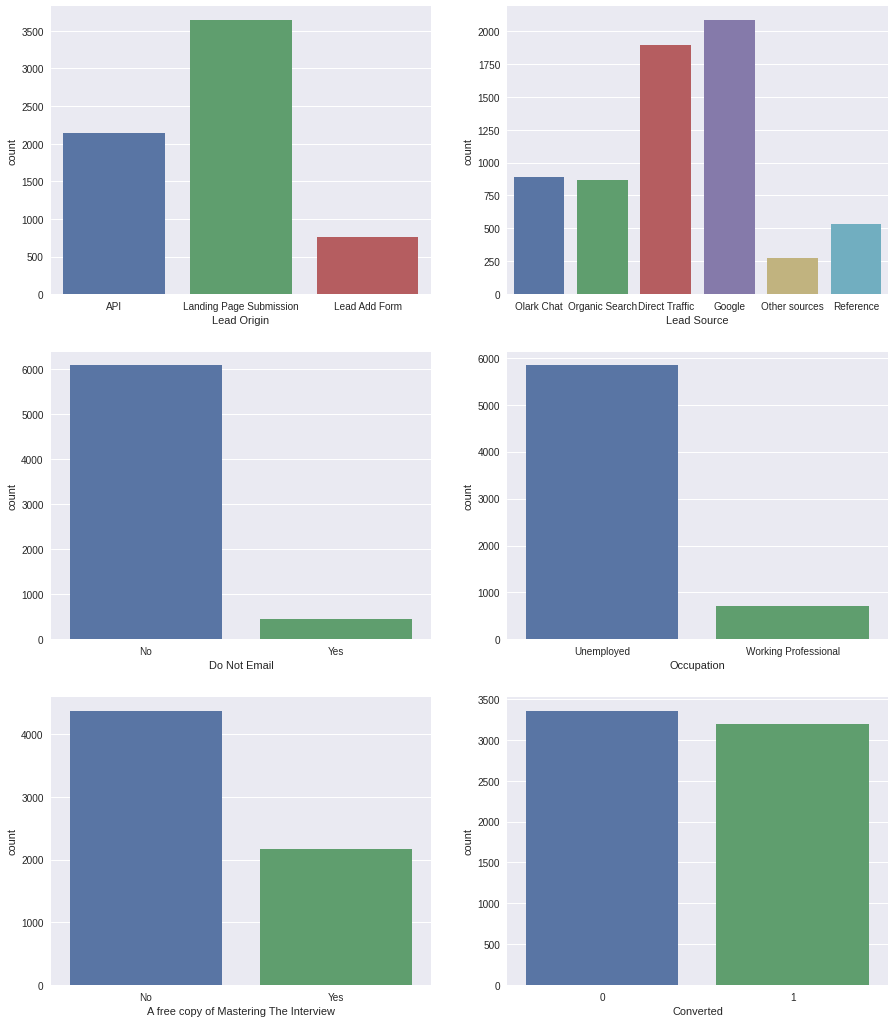

In [41]:
# Visualizing categorical columns using Boxplots
cols = ['Lead Origin','Lead Source','Do Not Email','Occupation',
        'A free copy of Mastering The Interview','Converted']
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(15,18))

for n,i in enumerate(cols):
    sns.countplot(x=cols[n], data=df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0

plt.show()

**Inferences:**
- Leads usually originates from landing page submission, followed by API.
- Google and Direct Traffic are two major sources of leads.
- Above plots shows, high distribution of lead falls under unemployed segment.

### **ii) Numerical**

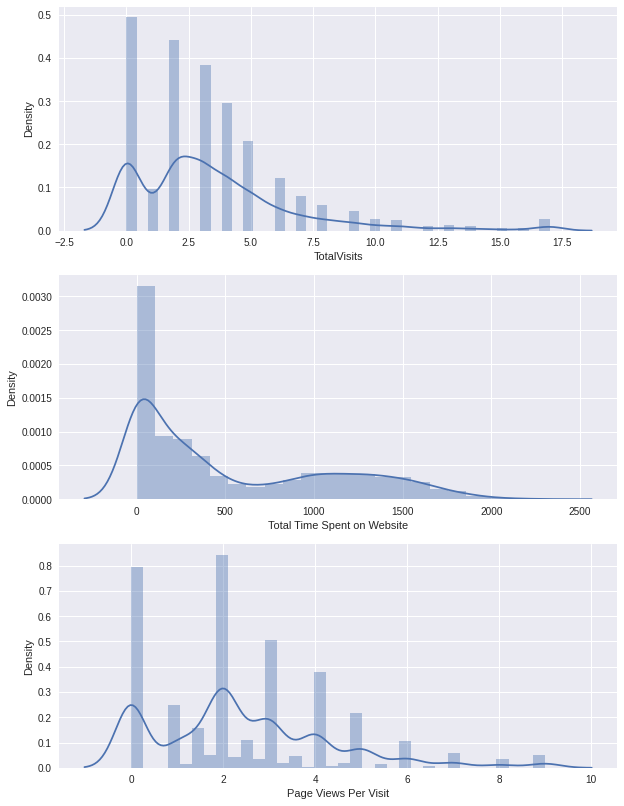

In [42]:
# Visualizing Numerical columns using Distribution Plot 

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

fig,ax = plt.subplots(3,figsize=(10,14))
for n,i in enumerate(cols):
    sns.distplot(df[i],ax=ax[n])
plt.show()

**Inferences:**
- As per distribution of total visits, 2 peaks around 3 and 20 visits are visible.


## **b) Bivariate Analysis**

### **i) Categorical - Categorical**

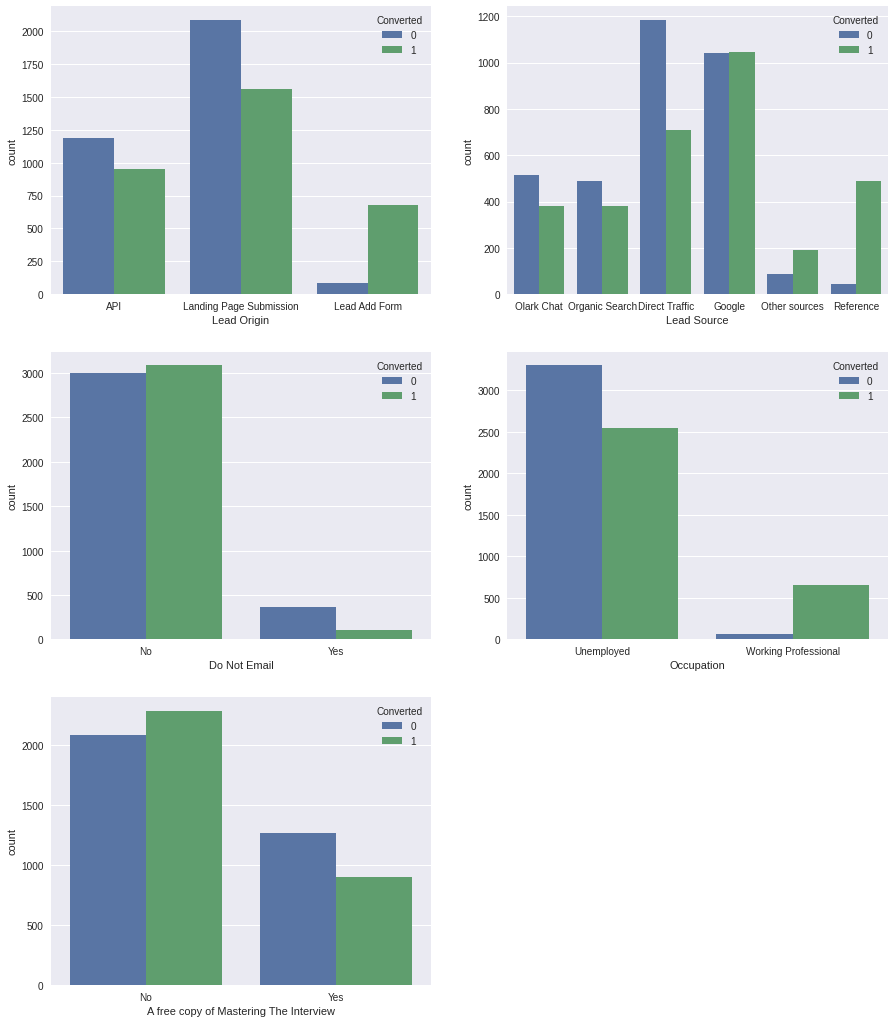

In [43]:
# Visualizing categorical columns using Boxplots
cols = ['Lead Origin','Lead Source','Do Not Email','Occupation',
        'A free copy of Mastering The Interview']
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(15,18))

for n,i in enumerate(cols):
    sns.countplot(x=cols[n], data=df,ax=ax[r,c],hue=df['Converted'])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

**Inferences:**
- Leads which originates from "Lead add form" have significant chance of conversion.
- Chances of conversion are high when the lead sources from "refrences", whereas opposite is true for "Direct Search".
- Even though customer base of "Working Professionals" is small they have  significant conversion rate, probably due to better financial situation.

### **ii) Categorical - Numerical**

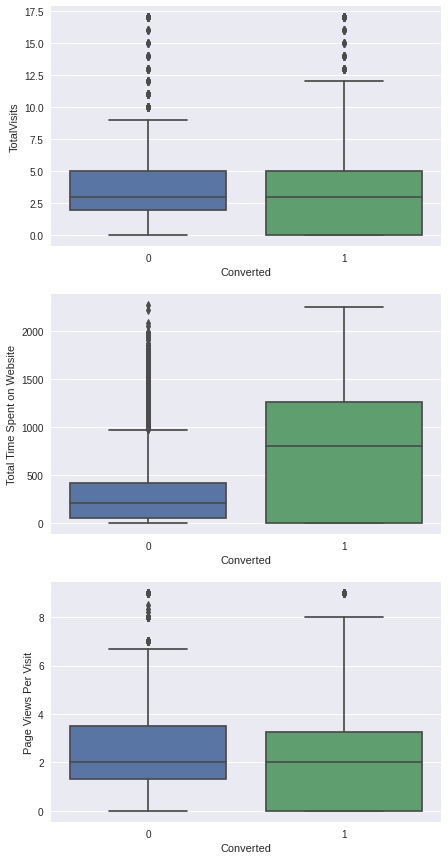

In [44]:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

fig,ax = plt.subplots(3,figsize=(7,15))
for n,i in enumerate(cols):
    sns.boxplot(x='Converted',y=i,data=df,ax=ax[n])
plt.show()

**Inferences:**

Based on above plots, it seems that leads those get converted usually spend more time on the website.

### **iii) Numerical - Numerical**

<Figure size 1080x1080 with 0 Axes>

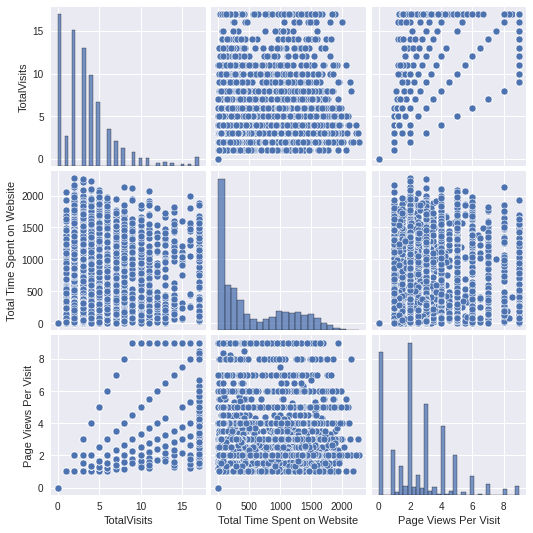

In [45]:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=[15,15])
sns.pairplot(df[cols])
plt.show()

**Inferences:**
- Page views per visit and Totalvisits show linear relationship.

# **4. Data Preparation**

## **a) Creating Dummies for categorical columns**

In [46]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Unemployed,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No


In [47]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
cat = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Occupation','A free copy of Mastering The Interview']
dummy_df = pd.get_dummies(df[cat], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy_df], axis=1)

# Dropping duplicate columns
df.drop(cat,axis=1,inplace=True)

In [48]:
df.shape

(6550, 14)

## **b) Performing Train-Test Split**

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop('Converted',axis=1)
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## **c) Scaling data using Standard Scaler**

In [50]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Do Not Email_Yes,Occupation_Working Professional,A free copy of Mastering The Interview_Yes
8766,2.313973,0.079143,0.642657,1,0,0,0,0,0,0,0,0,1
148,0.469900,-0.552124,0.041431,1,0,1,0,0,0,0,0,0,0
8146,3.236010,2.220569,2.353838,1,0,0,0,1,0,0,0,0,1
2782,-1.066827,-0.956694,-1.243239,0,0,0,1,0,0,0,0,0,0
6309,-1.066827,-0.956694,-1.243239,0,1,0,0,0,1,0,0,0,0


# **5. Model Building**

## **a) Feature Selection**

In [51]:
print("Initial feature count: ",len(X_train.columns))

Initial feature count:  13


### **Using RFE to select top 11 features**

In [52]:
# Selecting top 11 features using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

def rfe_features(model,n_features):
  '''
  Performs RFE to find best n_features for the model
  '''
  rfe = RFE(model,n_features)
  rfe.fit(X_train, y_train)
  print(pd.DataFrame(zip(X_train.columns, rfe.support_, rfe.ranking_),columns=["Features","support_","ranking_"]))
  return (X_train.columns[rfe.support_].tolist())

# Storing top 11 features obtianed via RFE to "col"
col = rfe_features(lr,11)

                                      Features  support_  ranking_
0                                  TotalVisits      True         1
1                  Total Time Spent on Website      True         1
2                         Page Views Per Visit      True         1
3          Lead Origin_Landing Page Submission     False         2
4                    Lead Origin_Lead Add Form      True         1
5                           Lead Source_Google      True         1
6                       Lead Source_Olark Chat      True         1
7                   Lead Source_Organic Search      True         1
8                    Lead Source_Other sources      True         1
9                        Lead Source_Reference      True         1
10                            Do Not Email_Yes      True         1
11             Occupation_Working Professional      True         1
12  A free copy of Mastering The Interview_Yes     False         3


### **Performing manual feature selection using VIF and p-value**

In [53]:
import statsmodels.api as sm

def sm_summary(col):
  X_train_sm = sm.add_constant(X_train[col])
  logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm2.fit()
  print(res.summary())

sm_summary(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4573
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.3
Date:                Mon, 07 Dec 2020   Deviance:                       4602.7
Time:                        17:48:11   Pearson chi2:                 5.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
# Dropping 'Lead Source_Other sources' due to high p-value
col.remove('Lead Source_Other sources')
sm_summary(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4574
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2301.3
Date:                Mon, 07 Dec 2020   Deviance:                       4602.7
Time:                        17:48:11   Pearson chi2:                 5.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [55]:
# Dropping 'Lead Source_Reference' due to high p-value
col.remove('Lead Source_Reference')
sm_summary(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4575
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.1
Date:                Mon, 07 Dec 2020   Deviance:                       4604.3
Time:                        17:48:11   Pearson chi2:                 5.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
print(vif)

                          Features   VIF
0             Page Views Per Visit  2.38
1                      TotalVisits  1.99
2           Lead Source_Olark Chat  1.40
3        Lead Origin_Lead Add Form  1.34
4      Total Time Spent on Website  1.24
5       Lead Source_Organic Search  1.19
6  Occupation_Working Professional  1.14
7               Lead Source_Google  1.12
8                 Do Not Email_Yes  1.04


VIF seems to be normal for above features. Thus, we can proceed to model buliding.

**Final FEATURE LIST**

1. 'TotalVisits'
2. 'Total Time Spent on Website'
3. 'Page Views Per Visit'
4. 'Lead Origin_Lead Add Form'
5. 'Lead Source_Google'
6. 'Lead Source_Olark Chat'
7. 'Lead Source_Organic Search'
8. 'Do Not Email_Yes'
9. 'Occupation_Working Professional'

## **b) Determining optimal threshold for model**

In [57]:
# Fitting model on train set
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4585
Model:                            GLM   Df Residuals:                     4575
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2302.1
Date:                Mon, 07 Dec 2020   Deviance:                       4604.3
Time:                        17:48:11   Pearson chi2:                 5.05e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [58]:
# Generating prediction probabilities for training set
y_train_prob = res.predict(X_train_sm).values.reshape(-1)
output_df = pd.DataFrame(data=y_train.tolist(),columns=['y_true'])
output_df['y_probability'] = y_train_prob
output_df.head()

,y_true,y_probability
0,0,0.418961
1,0,0.286604
2,1,0.906591
3,1,0.351726
4,1,0.827862


In [59]:
# Generating predictions for "training set" by varing threshold
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    output_df[i]= output_df['y_probability'].map(lambda x: 1 if x > i else 0)
output_df.head()

,y_true,y_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.418961,1,1,1,1,1,0,0,0,0,0
1,0,0.286604,1,1,1,0,0,0,0,0,0,0
2,1,0.906591,1,1,1,1,1,1,1,1,1,1
3,1,0.351726,1,1,1,1,0,0,0,0,0,0
4,1,0.827862,1,1,1,1,1,1,1,1,1,0


In [60]:
# Calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Threshold','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(output_df['y_true'], output_df[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[int(i*10)] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

   Threshold  Accuracy  Sensitivity  Specificity
0        0.0  0.481352     1.000000     0.000000
1        0.1  0.514504     0.998188     0.065601
2        0.2  0.635987     0.948799     0.345669
3        0.3  0.729335     0.892614     0.577796
4        0.4  0.771210     0.761214     0.780488
5        0.5  0.764449     0.698233     0.825904
6        0.6  0.747874     0.623018     0.863751
7        0.7  0.717775     0.518351     0.902860
8        0.8  0.683097     0.403715     0.942389
9        0.9  0.609160     0.201178     0.987805


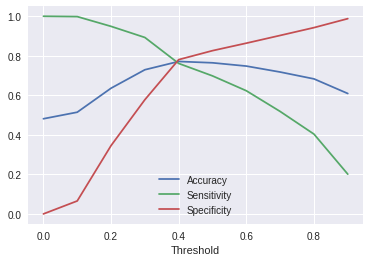

In [61]:
# Plotting 'Accuracy','Sensitivity','Specificity' against 'Threshold'
cutoff_df.plot.line(x='Threshold', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

**Based on above plot, optimal threshold seems to be around 0.4. Therefore, considering a sub-optimal threshold i.e. 0.36 for better business understanding is also fine.**

In [62]:
# Generating predictions for "train set" using "0.36" as threshold
output_df['final_predicted'] = output_df['y_probability'].map(lambda x: 1 if x > 0.36 else 0)
output_df.head()

,y_true,y_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.418961,1,1,1,1,1,0,0,0,0,0,1
1,0,0.286604,1,1,1,0,0,0,0,0,0,0,0
2,1,0.906591,1,1,1,1,1,1,1,1,1,1,1
3,1,0.351726,1,1,1,1,0,0,0,0,0,0,0
4,1,0.827862,1,1,1,1,1,1,1,1,1,0,1


In [63]:
# Evaluation metrics for "training set"
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
confusion = confusion_matrix(output_df['y_true'], output_df['final_predicted'])
acc = round(accuracy_score(output_df['y_true'], output_df['final_predicted']),2)
recall = round(recall_score(output_df['y_true'], output_df['final_predicted']),2)
prec = round(precision_score(output_df['y_true'], output_df['final_predicted']),2)

print("** TRAINING - EVALUATION METRICS **")
print("Confusion Matrix : \n",confusion,"\n")
print(f" Accuracy: {acc}\n Recall: {recall}\n Precision: {prec}")

** TRAINING - EVALUATION METRICS **
Confusion Matrix : 
 [[1810  568]
 [ 490 1717]] 

 Accuracy: 0.77
 Recall: 0.78
 Precision: 0.75


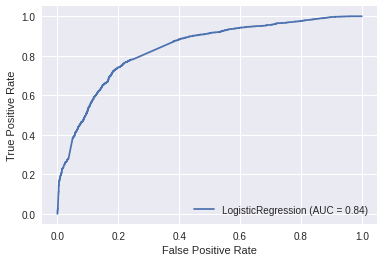

In [64]:
# Plotting ROC curve for "Train set"
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train[col],y_train)
plot_roc_curve(lr,X_train[col],y_train)

## **c) Evaluating model on test data**

In [65]:
# Scaling "test set"
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Generating prediction probabilities for "test set"
X_test_sm = sm.add_constant(X_test[col])
y_test_prob = res.predict(X_test_sm).values.reshape(-1)

results = pd.DataFrame(data=y_test.tolist(),columns=['y_test_true'])
results['y_probability'] = y_test_prob
results.head()

,y_test_true,y_probability
0,0,0.254288
1,0,0.055191
2,0,0.242197
3,0,0.247663
4,1,0.688162


In [66]:
# Performing predictions concidering 0.36 (i.e sub-optimal point) as threshold 
results['y_test_pred']= results['y_probability'].map(lambda x: 1 if x > 0.36 else 0)
results.head()

,y_test_true,y_probability,y_test_pred
0,0,0.254288,0
1,0,0.055191,0
2,0,0.242197,0
3,0,0.247663,0
4,1,0.688162,1


In [67]:
# Evaluation metrics for "training set"
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
confusion_test = confusion_matrix(results['y_test_true'], results['y_test_pred'])
acc_test = round(accuracy_score(results['y_test_true'], results['y_test_pred']),2)
recall_test = round(recall_score(results['y_test_true'], results['y_test_pred']),2)
prec_test = round(precision_score(results['y_test_true'], results['y_test_pred']),2)

print("** TEST - EVALUATION METRICS **")
print("Confusion Matrix : \n",confusion_test,"\n")
print(f" Accuracy: {acc_test}\n Recall: {recall_test}\n Precision: {prec_test}")

** TEST - EVALUATION METRICS **
Confusion Matrix : 
 [[762 219]
 [225 759]] 

 Accuracy: 0.77
 Recall: 0.77
 Precision: 0.78


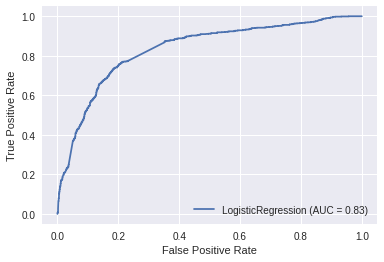

In [68]:
# Plotting ROC curve for "Test set"
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train[col],y_train)
plot_roc_curve(lr,X_test[col],y_test)

**Based on above metrics, it can be concluded that the model is able to genralize. As the metrics are quite similar for train as well as train set.**

## **d) Generating score variable**

In [69]:
results.head()

,y_test_true,y_probability,y_test_pred
0,0,0.254288,0
1,0,0.055191,0
2,0,0.242197,0
3,0,0.247663,0
4,1,0.688162,1


In [70]:
# Assigning lead score to "test set"
results['Lead_Score'] = 100 * results['y_probability']

# Concatenating attributes to result dataframe
results = pd.concat([X_test[col].reset_index(drop=True),results],axis=1)
results.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Do Not Email_Yes,Occupation_Working Professional,y_test_true,y_probability,y_test_pred,Lead_Score
0,-0.144791,-0.512016,0.298365,0,1,0,0,0,0,0,0.254288,0,25.428788
1,-0.452136,-0.548637,-0.729371,0,0,0,0,1,0,0,0.055191,0,5.519120
2,0.777246,-0.646291,-0.472437,0,0,0,1,0,0,0,0.242197,0,24.219744
3,2.621319,-0.709069,0.812233,0,0,0,0,0,0,0,0.247663,0,24.766258
4,-0.452136,1.240536,-0.215503,0,1,0,0,0,0,1,0.688162,1,68.816218


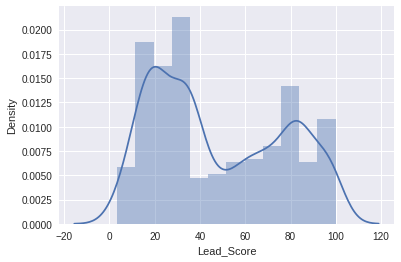

In [71]:
# Distribution of lead score between 0 and 100
sns.distplot(results['Lead_Score'])